<a href="https://colab.research.google.com/github/ag0466154-cpu/Unidad-4_Estadistica2025B-/blob/main/Problemario_Unidad_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [ ]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#ANDREA GARCIA AMAYA

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'tiempo ~ C(metodo)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#ANDREA GARCIA AMAYA

,sum_sq,df,F,PR(>F)
C(metodo),69.5,3.0,9.423729,0.001771
Residual,29.5,12.0,NaN,NaN


valor-p (Shapiro) = 0.2808008139238357


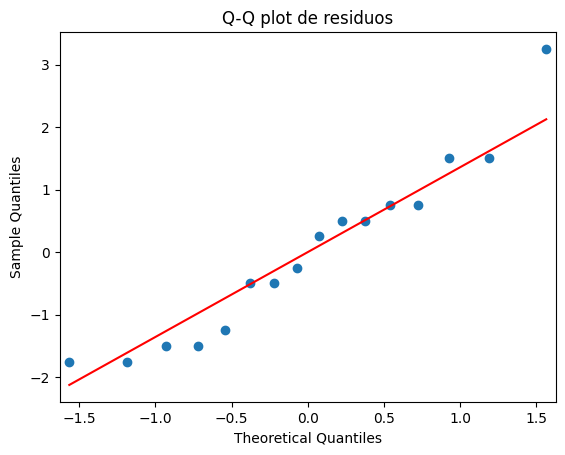

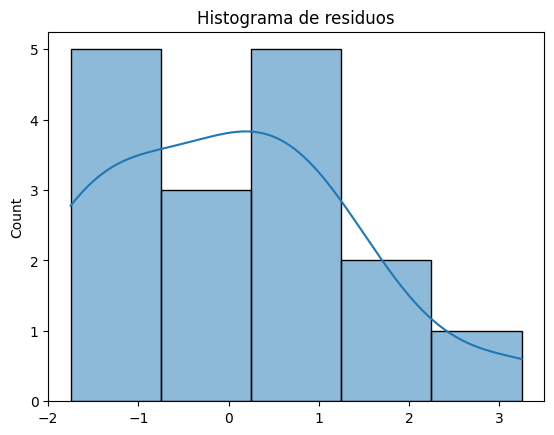

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
from scipy.stats import levene
#ANDREA GARCIA AMAYA
# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['metodo'] == 'A']['tiempo']
grupo2 = df[df['metodo'] == 'B']['tiempo']
grupo3 = df[df['metodo'] == 'C']['tiempo']
grupo4 = df[df['metodo'] == 'D']['tiempo']

stat, p = levene(grupo1, grupo2, grupo3,grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.4485146502776487


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

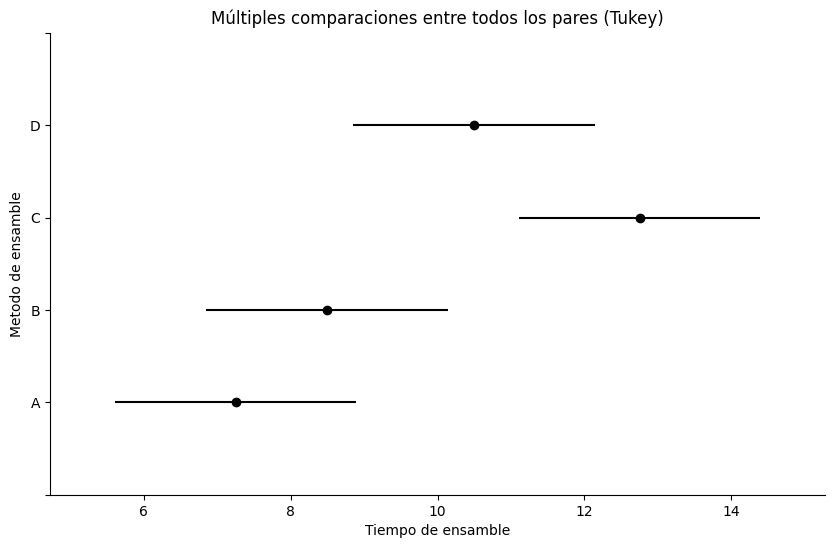

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Metodo de ensamble",
                        xlabel="Tiempo de ensamble")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#ANDREA GARCIA AMAYA

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(metodo)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#ANDREA GARCIA AMAYA

η² (tamaño de efecto): 0.702


**Conclusión general:**
Si hay diferencias significativas en el tiempo de ensamble entre los cuatro métodos más en el método C ya que resulta mucho más lento que los métodos A y B pero no se observan diferencias estadísticamente significativas entre los métodos A, B y D.

Los métodos A y B son las mejores opciones con tiempos promedio de 7.25 y 8.5 minutos, entonces para mejorar el tiempo de ensamble se recomienda usar cualquiera de estos dos métodos y el método C no es opción por que es menos eficiente mientras que el método D aunque no sea significativamente diferente de A o B tiene un tiempo medio mayor y por tanto no podria tomarse tampoco como la mejor opción.

2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
tipo_de_cuero,observaciones
A,264
A,260
A,258
A,241
A,262
A,255
B,208
B,220
B,216
B,200
B,213
B,206
C,220
C,263
C,219
C,225
C,230
C,228
D,217
D,226
D,215
D,227
D,220
D,222
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#ANDREA GARCIA AMAYA

,tipo_de_cuero,observaciones
0,A,264
1,A,260
2,A,258
3,A,241
4,A,262
5,A,255
6,B,208
7,B,220
8,B,216
9,B,200


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
#Nivel de significancia: 0.05
modelo_lineal = ols(f'observaciones ~ C(tipo_de_cuero)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#ANDREA GARCIA AMAYA

,sum_sq,df,F,PR(>F)
C(tipo_de_cuero),7019.458333,3.0,22.755356,0.000001
Residual,2056.500000,20.0,NaN,NaN


valor-p (Shapiro) = 0.00967014513830024


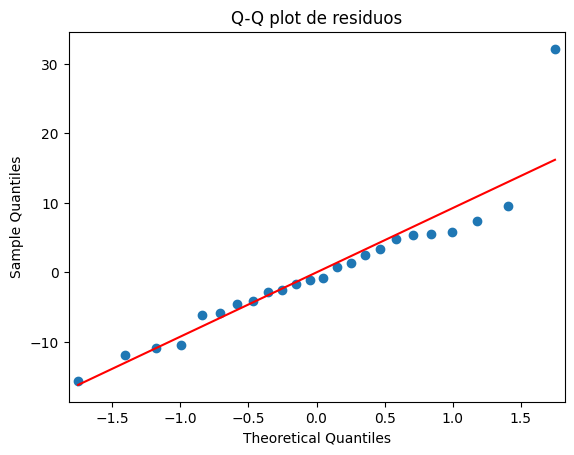

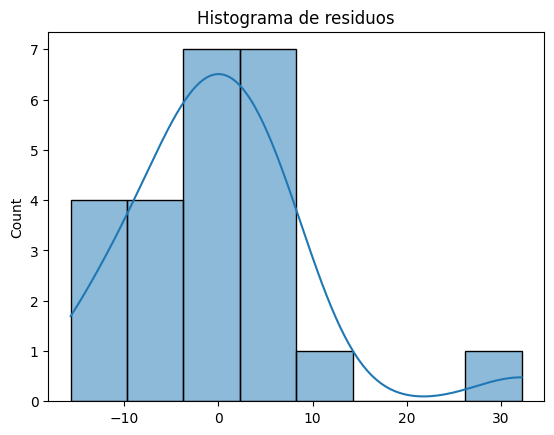

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tipo_de_cuero'] == 'A']['observaciones']
grupo2 = df[df['tipo_de_cuero'] == 'B']['observaciones']
grupo3 = df[df['tipo_de_cuero'] == 'C']['observaciones']
grupo4 = df[df['tipo_de_cuero'] == 'D']['observaciones']

stat, p = levene(grupo1, grupo2, grupo3,grupo4)
print(f"p-valor de Levene: {p}")
#ANDREA GARCIA AMAYA

p-valor de Levene: 0.6351342635286297


Lambda óptimo: -3.707788382033557


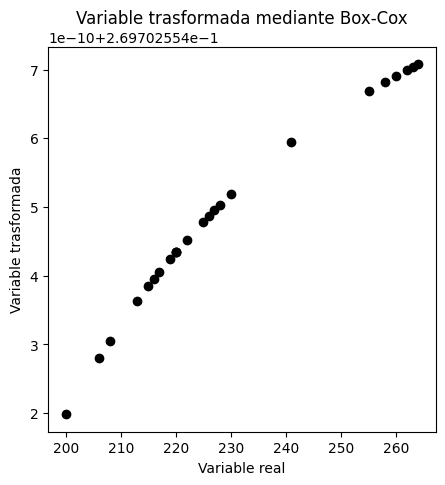

In [ ]:
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["respuesta_boxcox"], lambda_opt = boxcox(df["observaciones"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["observaciones"], df["respuesta_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
df

,tipo_de_cuero,observaciones,respuesta_boxcox
0,A,264,0.269703
1,A,260,0.269703
2,A,258,0.269703
3,A,241,0.269703
4,A,262,0.269703
5,A,255,0.269703
6,B,208,0.269703
7,B,220,0.269703
8,B,216,0.269703
9,B,200,0.269703


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'respuesta_boxcox ~ C(tipo_de_cuero)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#ANDREA GARCIA AMAYA

,sum_sq,df,F,PR(>F)
C(tipo_de_cuero),3.735519e-19,3.0,23.368221,9.595697e-07
Residual,1.065698e-19,20.0,NaN,NaN


valor-p (Shapiro) = 0.4576953738713335


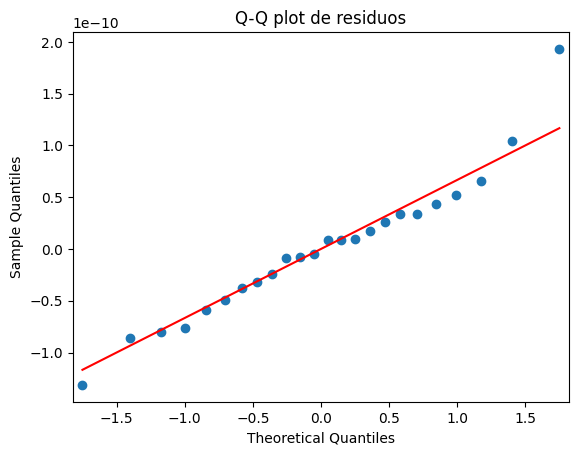

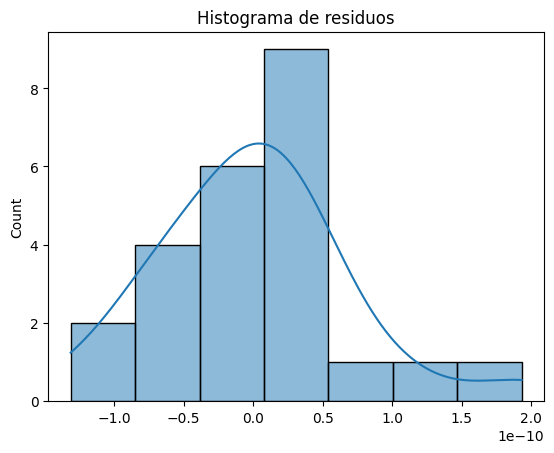

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
from scipy.stats import levene
#ANDREA GARCIA AMAYA
# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tipo_de_cuero'] == 'A']['respuesta_boxcox']
grupo2 = df[df['tipo_de_cuero'] == 'B']['respuesta_boxcox']
grupo3 = df[df['tipo_de_cuero'] == 'C']['respuesta_boxcox']
grupo4 = df[df['tipo_de_cuero'] == 'D']['respuesta_boxcox']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.3428159311494669


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower upper reject
------------------------------------------------
     A      B     -0.0    0.0  -0.0  -0.0   True
     A      C     -0.0 0.0048  -0.0  -0.0   True
     A      D     -0.0 0.0001  -0.0  -0.0   True
     B      C      0.0 0.0018   0.0   0.0   True
     B      D      0.0 0.0613  -0.0   0.0  False
     C      D     -0.0  0.401  -0.0   0.0  False
------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

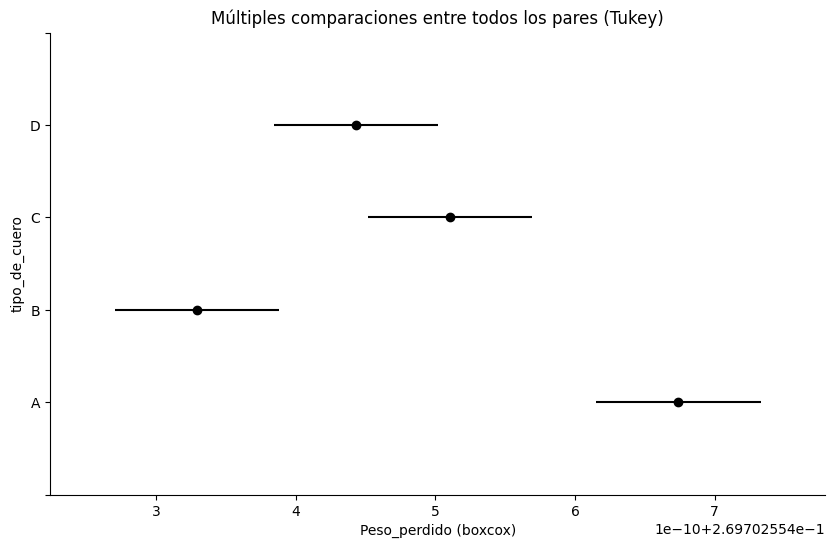

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['respuesta_boxcox'],
                          groups=df['tipo_de_cuero'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="tipo_de_cuero", xlabel="Peso_perdido (boxcox)")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#ANDREA GARCIA AMAYA

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(tipo_de_cuero)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#ANDREA GARCIA AMAYA

η² (tamaño de efecto): 0.778


In [ ]:
#ANDREA GARCIA AMAYA

**Conclusión general:** Si hay diferencias significativas en la resistencia al desgaste entre los cuatro tipos de cuero. El cuero tipo B tiene el menor desgaste promedio con 209.8 mg y es mucho más resistente que los tipos A y C. No se observa una diferencia estadísticamente significativas entre los cueros B y D esto nos  dice que ambos tienen un desempeño similar en el desgaste, pero el cuero tipo A tiene el mayor desgaste con 256.7 mg y es muccho menos resistente que todos los demás.

Para mejorar la calidad de las suelas, se recomienda seleccionar el cuero tipo B o el tipo D como mejores opciones debido a su baja pérdida de peso. Los tipos A y C no son ocpiones por que su resistencia al desgaste es menos.

3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [ ]:
import pandas as pd
from io import StringIO

datos = '''
tratamiento,tiempo
T1,213
T1,214
T1,204
T1,208
T1,212
T1,200
T1,207
T2,76
T2,85
T2,74
T2,78
T2,82
T2,75
T2,82
T3,57
T3,67
T3,55
T3,64
T3,61
T3,63
T3,63
T4,84
T4,82
T4,85
T4,92
T4,87
T4,79
T4,90
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#ANDREA GARCIA AMAYA

,tratamiento,tiempo
0,T1,213
1,T1,214
2,T1,204
3,T1,208
4,T1,212
5,T1,200
6,T1,207
7,T2,76
8,T2,85
9,T2,74


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'tiempo ~ C(tratamiento)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#ANDREA GARCIA AMAYA

,sum_sq,df,F,PR(>F)
C(tratamiento),95041.250000,3.0,1558.966022,1.260640e-27
Residual,487.714286,24.0,NaN,NaN


In [ ]:
#ANDREA GARCIA AMAYA

valor-p (Shapiro) = 0.34689165649616827


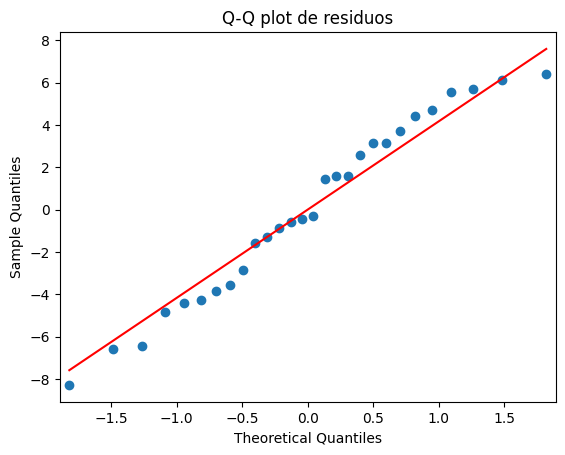

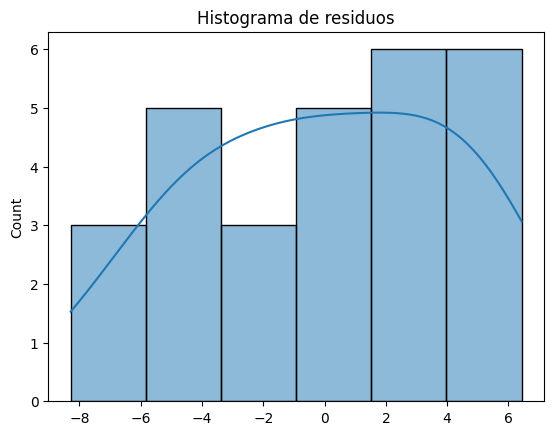

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 'T1']['tiempo']
grupo2 = df[df['tratamiento'] == 'T2']['tiempo']
grupo3 = df[df['tratamiento'] == 'T3']['tiempo']
grupo4 = df[df['tratamiento'] == 'T4']['tiempo']

stat, p = levene(grupo1, grupo2, grupo3, grupo4)
print(f"p-valor de Levene: {p}")
#ANDREA GARCIA AMAYA

p-valor de Levene: 0.9201477397132211


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    T1     T2 -129.4286    0.0 -136.0757 -122.7815   True
    T1     T3 -146.8571    0.0 -153.5043   -140.21   True
    T1     T4 -122.7143    0.0 -129.3614 -116.0672   True
    T2     T3  -17.4286    0.0  -24.0757  -10.7815   True
    T2     T4    6.7143 0.0471    0.0672   13.3614   True
    T3     T4   24.1429    0.0   17.4957     30.79   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

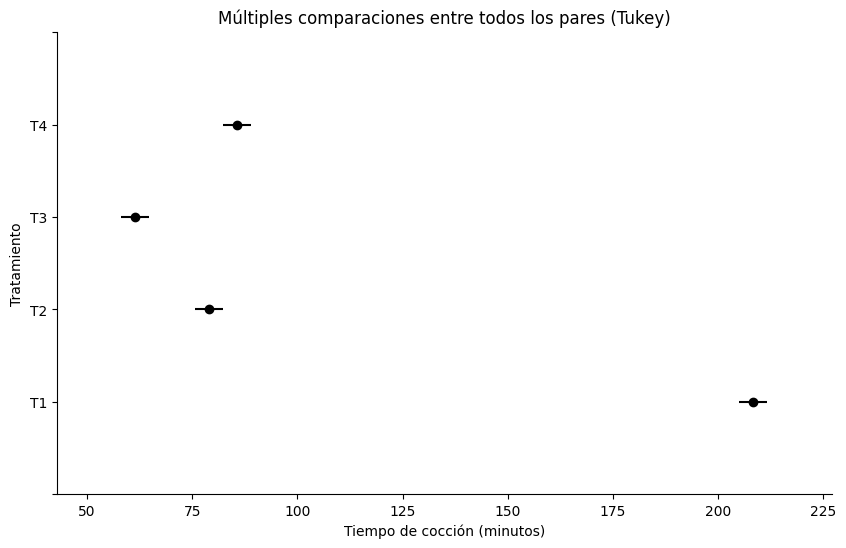

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['tratamiento'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Tratamiento",
                        xlabel="Tiempo de cocción (minutos)")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#ANDREA GARCIA AMAYA

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(tratamiento)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#ANDREA GARCIA AMAYA

η² (tamaño de efecto): 0.995


In [ ]:
#ANDREA GARCIA AMAYA

**Conclusión general**: Todos los tratamientos aplicados para reducir el tiempo de cocción de los frijoles tienen diferencias significativas entre sí. El tratamiento T3 (remojo en agua con sal común) es el mejor ya que tiene un tiempo de cocción promedio de 61.4 minuto de ahi le sigue del tratamiento T2 (remojo en agua con bicarbonato de sodio) con 78.9 minutos. El tratamiento T4 (combinación de bicarbonato y sal) tiene un tiempo de 85.6 minutos es menos efectivo que T2 y T3. El tratamiento control T1 tiene el tiempo de cocción más alto de 208.3 minutos, entonces todos los tratamientos reducen significativamente el tiempo de cocción comparado al control.

Para mejorar el proceso y minimizar el tiempo de cocción es mejor  utilizar el tratamiento T3 de remojo en agua con sal comun. Como segunda opción seria T2 es una alternativa buena pero menos efectiva y el tratamiento T4 no se recomienda debido a su menor eficiencia comparado a T2 y T3.

4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
temperatura,modulos
20°C,15
20°C,18
20°C,13
20°C,12
40°C,17
40°C,21
40°C,11
40°C,16
60°C,23
60°C,19
60°C,25
60°C,22
80°C,28
80°C,32
80°C,34
80°C,31
100°C,45
100°C,51
100°C,57
100°C,48
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#ANDREA GARCIA AMAYA

,temperatura,modulos
0,20°C,15
1,20°C,18
2,20°C,13
3,20°C,12
4,40°C,17
5,40°C,21
6,40°C,11
7,40°C,16
8,60°C,23
9,60°C,19


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'modulos ~ C(temperatura)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#ANDREA GARCIA AMAYA

,sum_sq,df,F,PR(>F)
C(temperatura),3411.8,4.0,68.054521,1.963480e-09
Residual,188.0,15.0,NaN,NaN


valor-p (Shapiro) = 0.7785351257478148


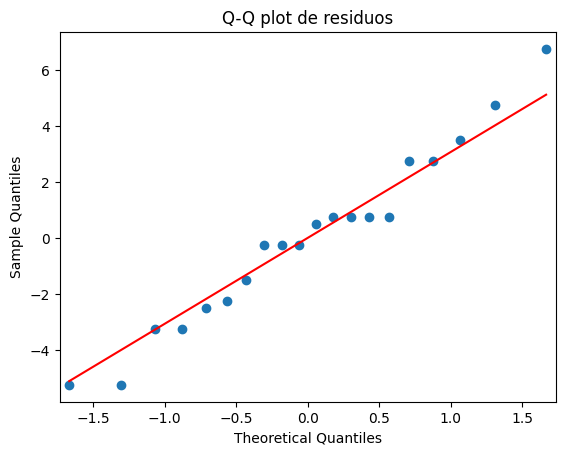

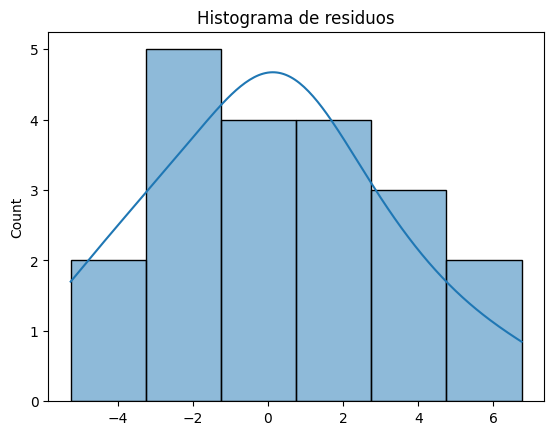

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['temperatura'] == '20°C']['modulos']
grupo2 = df[df['temperatura'] == '40°C']['modulos']
grupo3 = df[df['temperatura'] == '60°C']['modulos']
grupo4 = df[df['temperatura'] == '80°C']['modulos']
grupo5 = df[df['temperatura'] == '100°C']['modulos']

stat, p = levene(grupo1, grupo2, grupo3, grupo4, grupo5)
print(f"p-valor de Levene: {p}")
#ANDREA GARCIA AMAYA

p-valor de Levene: 0.6159602096484009


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 100°C   20°C   -35.75    0.0 -43.4801 -28.0199   True
 100°C   40°C    -34.0    0.0 -41.7301 -26.2699   True
 100°C   60°C    -28.0    0.0 -35.7301 -20.2699   True
 100°C   80°C    -19.0    0.0 -26.7301 -11.2699   True
  20°C   40°C     1.75 0.9535  -5.9801   9.4801  False
  20°C   60°C     7.75 0.0493   0.0199  15.4801   True
  20°C   80°C    16.75 0.0001   9.0199  24.4801   True
  40°C   60°C      6.0 0.1696  -1.7301  13.7301  False
  40°C   80°C     15.0 0.0002   7.2699  22.7301   True
  60°C   80°C      9.0 0.0191   1.2699  16.7301   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

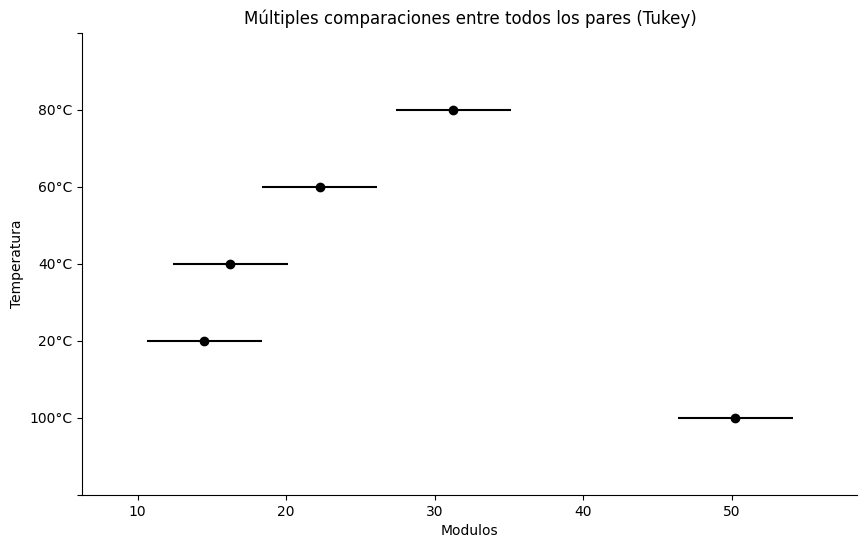

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['modulos'], groups=df['temperatura'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Temperatura", xlabel="Modulos")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#ANDREA GARCIA AMAYA

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(temperatura)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#ANDREA GARCIA AMAYA

η² (tamaño de efecto): 0.948


**Conclusión general:** La temperatura tiene un efecto significativo en el deterioro de los tableros electrónicos medido mediante la intensidad de corriente. La temperatura de 100°C tiene el mayor deterioro mostrando diferencias significativas con todas las demás temperaturas y existe una  tendencia donde el deterioro aumenta con la temperatura.

No hay diferencias significativas entre las temperaturas de 20°C y 40°C puede que ambas generan un deterioro similar y  partir de los 60°C el deterioro se incrementa significativamente siendo esta temperatura significativamente mayor que 20°C, y la temperatura de 80°C significativamente mayor que 40°C y 60°C.

Para garantizar la máxima confiabilidad de los tableros electrónicos se recomienda mantener las temperaturas por debajo de los 60°C puede ser en el rango de 20°C a 40°C donde el deterioro es menos y no se observan diferencias significativas entre estos dos niveles térmicos.


5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
tratamiento,porcentaje
Con tratam,5.3
Con tratam,4.0
Con tratam,4.0
Con tratam,4.0
Con tratam,2.6
Con tratam,2.1
Con tratam,5.1
Con tratam,4.1
Con tratam,4.1
Con tratam,3.2
Con tratam,5.1
Con tratam,2.2
Con tratam,4.1
Sin tratam,8.0
Sin tratam,13.2
Sin tratam,7.2
Sin tratam,8.2
Sin tratam,9.1
Sin tratam,6.7
Sin tratam,12.6
Sin tratam,16.3
Sin tratam,9.2
Sin tratam,6.4
Sin tratam,7.2
Sin tratam,17.2
Sin tratam,12.3
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#ANDREA GARCIA AMAYA

,tratamiento,porcentaje
0,Con tratam,5.3
1,Con tratam,4.0
2,Con tratam,4.0
3,Con tratam,4.0
4,Con tratam,2.6
5,Con tratam,2.1
6,Con tratam,5.1
7,Con tratam,4.1
8,Con tratam,4.1
9,Con tratam,3.2


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'porcentaje ~ C(tratamiento)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#ANDREA GARCIA AMAYA

,sum_sq,df,F,PR(>F)
C(tratamiento),269.449615,1.0,37.102806,0.000003
Residual,174.293846,24.0,NaN,NaN


valor-p (Shapiro) = 0.08240142335256262


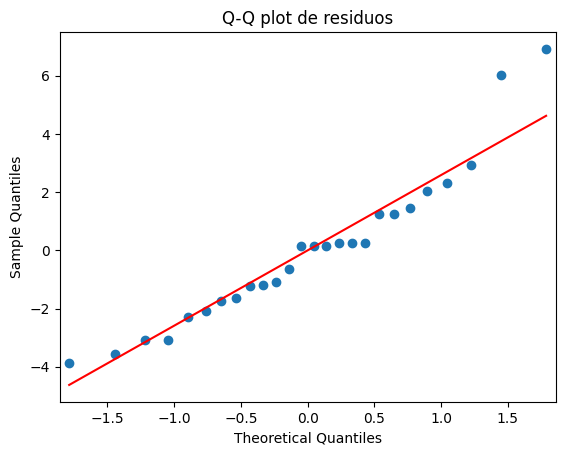

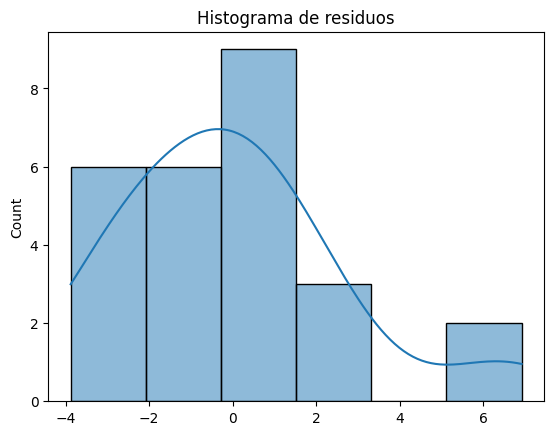

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 'Con tratam']['porcentaje']
grupo2 = df[df['tratamiento'] == 'Sin tratam']['porcentaje']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#ANDREA GARCIA AMAYA

p-valor de Levene: 0.006953158590874458


Lambda óptimo: -0.05387226813423122


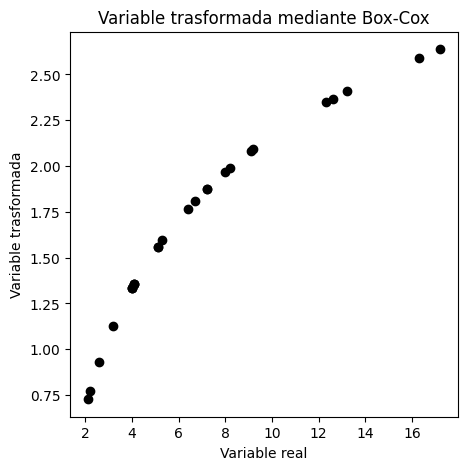

In [ ]:
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["respuesta_boxcox"], lambda_opt = boxcox(df["porcentaje"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["porcentaje"], df["respuesta_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
df

,tratamiento,porcentaje,respuesta_boxcox
0,Con tratam,5.3,1.594985
1,Con tratam,4.0,1.335793
2,Con tratam,4.0,1.335793
3,Con tratam,4.0,1.335793
4,Con tratam,2.6,0.931335
5,Con tratam,2.1,0.727305
6,Con tratam,5.1,1.559787
7,Con tratam,4.1,1.358694
8,Con tratam,4.1,1.358694
9,Con tratam,3.2,1.127458


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'respuesta_boxcox ~ C(tratamiento)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#ANDREA GARCIA AMAYA

,sum_sq,df,F,PR(>F)
C(tratamiento),5.040324,1.0,58.843753,6.583032e-08
Residual,2.055745,24.0,NaN,NaN


valor-p (Shapiro) = 0.5855089546322916


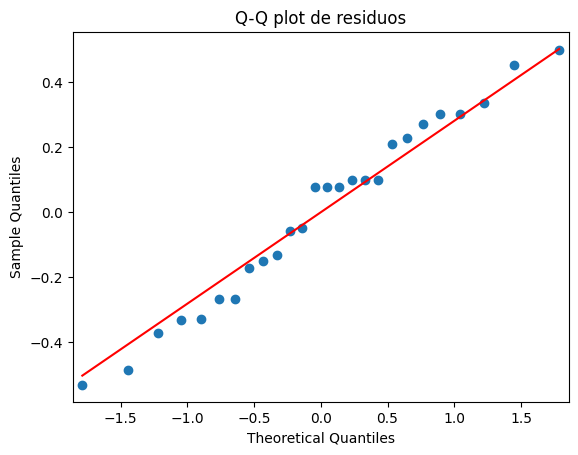

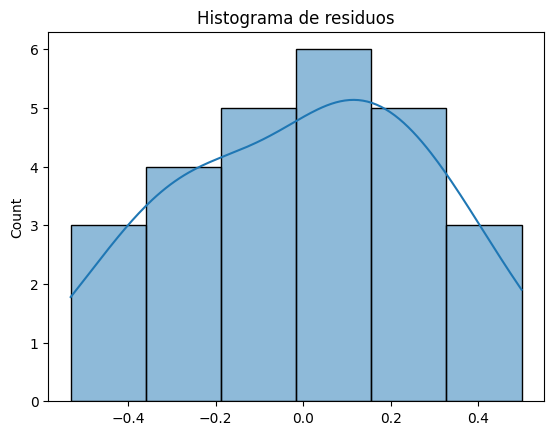

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['tratamiento'] == 'Con tratam']['respuesta_boxcox']
grupo2 = df[df['tratamiento'] == 'Sin tratam']['respuesta_boxcox']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#ANDREA GARCIA AMAYA

p-valor de Levene: 0.5435742179927381


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
Con tratam Sin tratam   0.8806   0.0 0.6437 1.1175   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

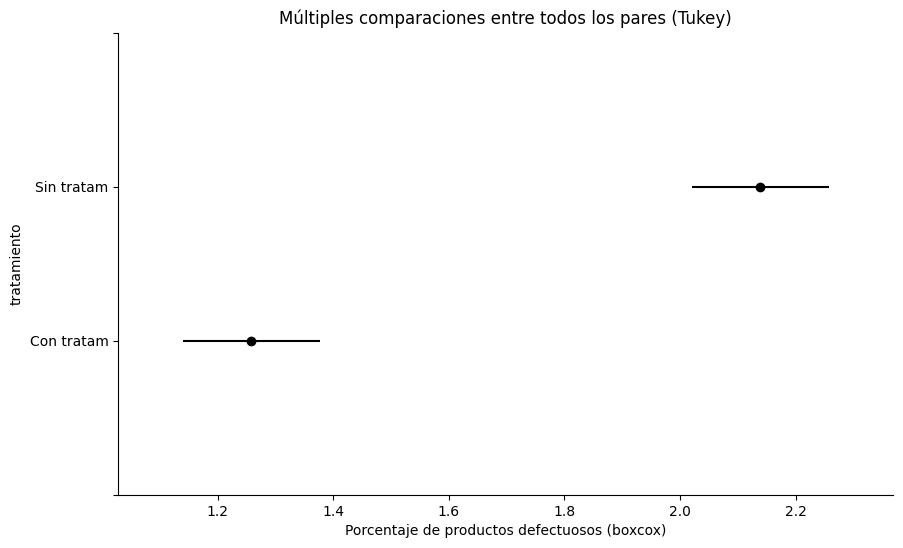

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['respuesta_boxcox'], groups=df['tratamiento'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Tratamiento",
                        xlabel="Porcentaje de productos defectuosos (boxcox)")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#ANDREA GARCIA AMAYA

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(tratamiento)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#ANDREA GARCIA AMAYA

η² (tamaño de efecto): 0.710


**Conclusión general:** El tratamiento propuesto reduce significativamente el porcentaje de productos defectuosos a diferencia del proceso sin tratamiento con un p-ajustado = 0.000. La diferencia media en los datos transformados con Box-Cox  es de 0.8806 con un intervalo de confianza que no incluye el cero (0.6437 a 1.1175) lo que afirma que la reducción es  significativa y nos dice que el tratamiento es efectivo para mejorar la calidad de la producción y es mejor usarlo para minimizar el porcentaje de defectuosos.



6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
almidon,dureza
2%,4.3
2%,5.2
2%,4.8
2%,4.5
5%,6.5
5%,7.3
5%,6.9
5%,6.1
10%,9.0
10%,7.8
10%,8.5
10%,8.1
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#ANDREA GARCIA AMAYA

,almidon,dureza
0,2%,4.3
1,2%,5.2
2,2%,4.8
3,2%,4.5
4,5%,6.5
5,5%,7.3
6,5%,6.9
7,5%,6.1
8,10%,9.0
9,10%,7.8


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'dureza ~ C(almidon)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#ANDREA GARCIA AMAYA

,sum_sq,df,F,PR(>F)
C(almidon),26.726667,2.0,58.101449,0.000007
Residual,2.070000,9.0,NaN,NaN


valor-p (Shapiro) = 0.4295206808037123


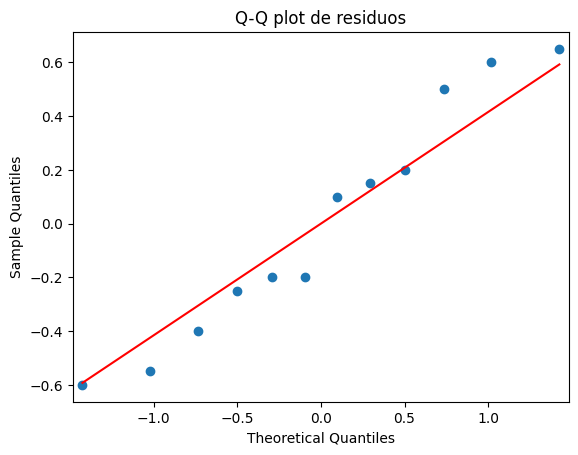

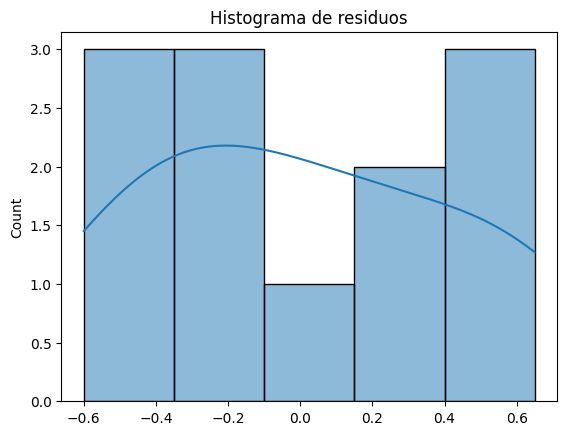

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['almidon'] == '2%']['dureza']
grupo2 = df[df['almidon'] == '5%']['dureza']
grupo3 = df[df['almidon'] == '10%']['dureza']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#ANDREA GARCIA AMAYA

p-valor de Levene: 0.771773370798543


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   10%     2%    -3.65    0.0 -4.5968 -2.7032   True
   10%     5%    -1.65 0.0023 -2.5968 -0.7032   True
    2%     5%      2.0 0.0006  1.0532  2.9468   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

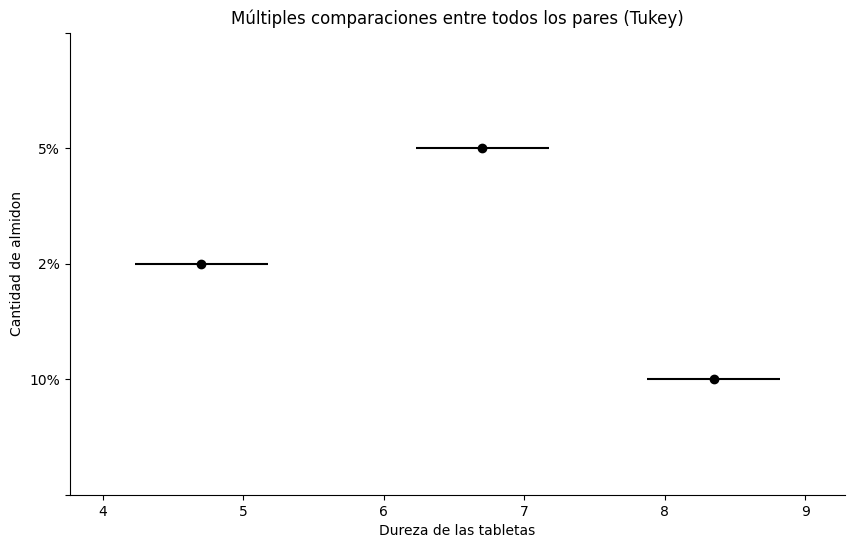

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['dureza'], groups=df['almidon'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Cantidad de almidon",
                        xlabel="Dureza de las tabletas")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#ANDREA GARCIA AMAYA

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(almidon)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#ANDREA GARCIA AMAYA

η² (tamaño de efecto): 0.928


**Conclusión general:** La cantidad de almidón tiene un efecto significativo en la dureza de las tabletas y todas las comparaciones entre los niveles de almidón 2%, 5% y 10% muestran diferencias estadísticamente significativas. La dureza media aumenta con la cantidad de almidón como 4.7 para 2%, 6.7 para 5% y 8.35 para 10%. Para mejorar la dureza de las tabletas se recomienda utilizar una cantidad de almidón del 10% si se busca una dureza intermedia puedes ser el 5% es una buena opción pero 2% ya no ya que da una dureza mas baja.

7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
niveles,rendimientos
N1,14.823
N1,14.676
N1,14.720
N1,14.5141
N1,15.065
N2,25.151
N2,25.401
N2,25.131
N2,25.031
N2,25.267
N3,32.605
N3,32.460
N3,32.256
N3,32.669
N3,32.111
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#ANDREA GARCIA AMAYA

,niveles,rendimientos
0,N1,14.8230
1,N1,14.6760
2,N1,14.7200
3,N1,14.5141
4,N1,15.0650
5,N2,25.1510
6,N2,25.4010
7,N2,25.1310
8,N2,25.0310
9,N2,25.2670


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'rendimientos ~ C(niveles)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#ANDREA GARCIA AMAYA

,sum_sq,df,F,PR(>F)
C(niveles),788.340773,2.0,10131.619332,4.298250e-20
Residual,0.466860,12.0,NaN,NaN


valor-p (Shapiro) = 0.8890610190283172


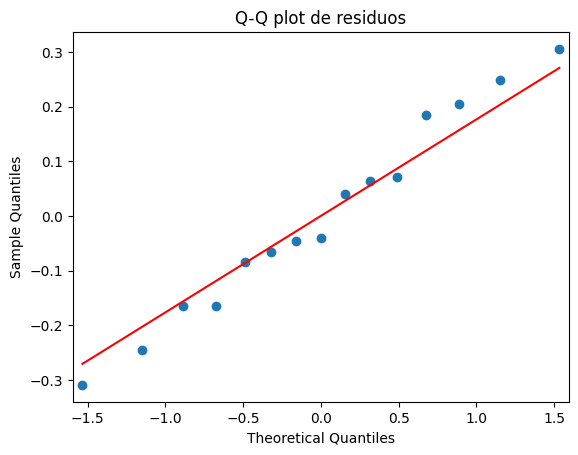

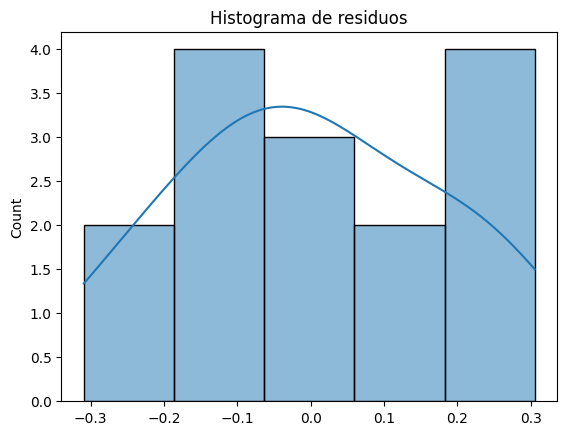

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['niveles'] == 'N1']['rendimientos']
grupo2 = df[df['niveles'] == 'N2']['rendimientos']
grupo3 = df[df['niveles'] == 'N3']['rendimientos']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#ANDREA GARCIA AMAYA

p-valor de Levene: 0.5977763142684792


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    N1     N2  10.4366   0.0 10.1038 10.7694   True
    N1     N3  17.6606   0.0 17.3278 17.9934   True
    N2     N3    7.224   0.0  6.8912  7.5568   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

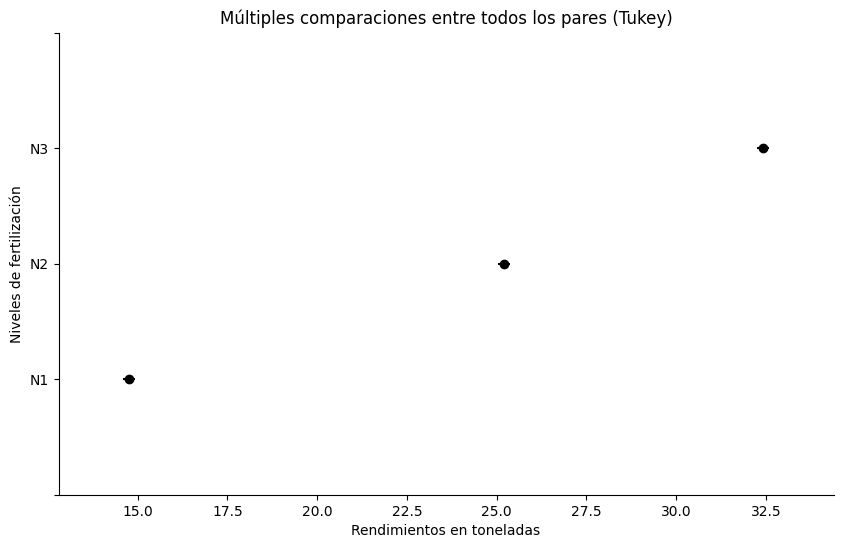

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['rendimientos'], groups=df['niveles'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Niveles de fertilización",
                        xlabel="Rendimientos en toneladas")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#ANDREA GARCIA AMAYA

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(niveles)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#ANDREA GARCIA AMAYA

η² (tamaño de efecto): 0.999


**Conclusión general:** El nivel de fertilización nitrogenada tiene un efecto altamente significativo en el rendimiento del pasto.

El nivel N3 tiene el mayor rendimiento promedio con 32.42 ton/ha, seguido por  N2 con 25.20 ton/ha y el N1 con 14.76 ton/ha. Las diferencias entre tratamientos son 10.44 ton/ha entre N1 y N2, 17.66 ton/ha entre N1 y N3, y 7.22 ton/ha entre N2 y N3.

Para mejorar la producción de pasto se recomienda utilizar el nivel de fertilización N3.

8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
aglutinante,friabilidad
PVP,0.485
PVP,0.250
PVP,0.073
PVP,0.205
PVP,0.161
CMC,9.64
CMC,9.37
CMC,9.53
CMC,9.86
CMC,9.79
Gre,0.289
Gre,0.275
Gre,0.612
Gre,0.152
Gre,0.137
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#ANDREA GARCIA AMAYA

,aglutinante,friabilidad
0,PVP,0.485
1,PVP,0.250
2,PVP,0.073
3,PVP,0.205
4,PVP,0.161
5,CMC,9.640
6,CMC,9.370
7,CMC,9.530
8,CMC,9.860
9,CMC,9.790


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'friabilidad ~ C(aglutinante)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#ANDREA GARCIA AMAYA

,sum_sq,df,F,PR(>F)
C(aglutinante),292.920971,2.0,4420.972597,6.198213e-18
Residual,0.397543,12.0,NaN,NaN


valor-p (Shapiro) = 0.42143454193876007


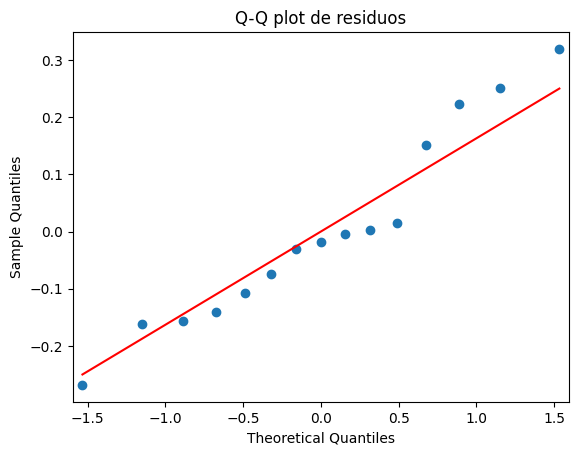

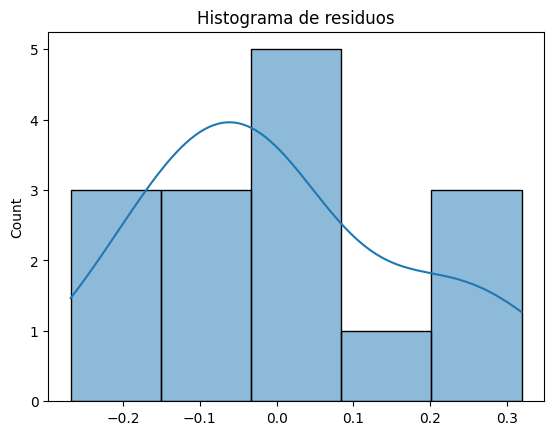

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['aglutinante'] == 'PVP']['friabilidad']
grupo2 = df[df['aglutinante'] == 'CMC']['friabilidad']
grupo3 = df[df['aglutinante'] == 'Gre']['friabilidad']

stat, p = levene(grupo1, grupo2, grupo3)
print(f"p-valor de Levene: {p}")
#ANDREA GARCIA AMAYA

p-valor de Levene: 0.8018412374552168


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   CMC    Gre   -9.345   0.0 -9.6521 -9.0379   True
   CMC    PVP  -9.4032   0.0 -9.7103 -9.0961   True
   Gre    PVP  -0.0582  0.87 -0.3653  0.2489  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

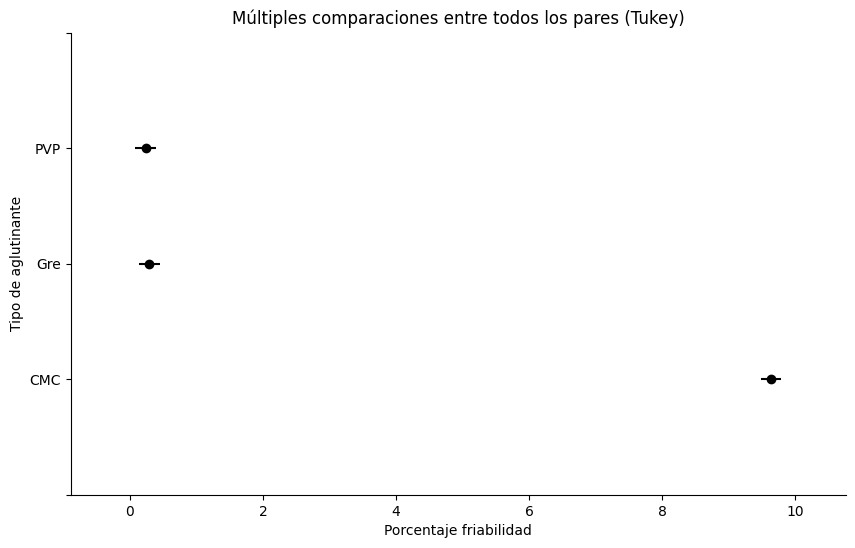

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['friabilidad'], groups=df['aglutinante'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Tipo de aglutinante",
                        xlabel="Porcentaje friabilidad")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#ANDREA GARCIA AMAYA

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(aglutinante)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#ANDREA GARCIA AMAYA

η² (tamaño de efecto): 0.999


**Conclusión general:** El tipo de aglutinante utilizado tiene un efecto significativo en el porcentaje de friabilidad de las tabletas de ampicilina. Los aglutinantes PVP y Gre no muestran diferencias significativas entre sí y ambos producen un porcentaje de friabilidad bajo con promedios de 0.23% y 0.29%. y el aglutinante CMC tiene un porcentaje de friabilidad significativamente mayor con promedio de 9.64% y se oberservan diferencias significativas entre ambos.

Para garantizar tabletas con baja friabilidad y mayor resistencia se recomienda usar el aglutinante PVP o el Gre ya que ambos son igualmente efectivos.

9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
clona,azucares
C1,8.69
C1,6.68
C1,6.83
C1,6.43
C1,10.30
C2,8.00
C2,16.41
C2,12.43
C2,10.99
C2,15.53
C3,17.39
C3,13.73
C3,15.62
C3,17.05
C3,15.42
C4,10.37
C4,9.16
C4,8.83
C4,4.40
C4,10.38
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#ANDREA GARCIA AMAYA

,clona,azucares
0,C1,8.69
1,C1,6.68
2,C1,6.83
3,C1,6.43
4,C1,10.30
5,C2,8.00
6,C2,16.41
7,C2,12.43
8,C2,10.99
9,C2,15.53


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'azucares ~ C(clona)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#ANDREA GARCIA AMAYA

,sum_sq,df,F,PR(>F)
C(clona),209.90716,3.0,12.327073,0.000198
Residual,90.81676,16.0,NaN,NaN


valor-p (Shapiro) = 0.7677173153296


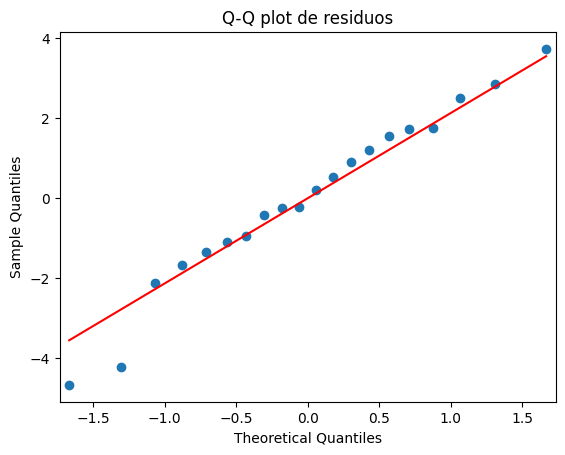

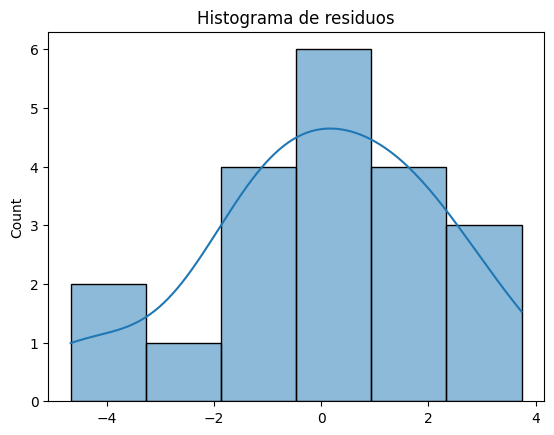

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['clona'] == 'C1']['azucares']
grupo2 = df[df['clona'] == 'C2']['azucares']
grupo3 = df[df['clona'] == 'C3']['azucares']
grupo4 = df[df['clona'] == 'C4']['azucares']
stat, p = levene(grupo1, grupo2, grupo3,grupo4)
print(f"p-valor de Levene: {p}")
#ANDREA GARCIA AMAYA

p-valor de Levene: 0.4290096340206233


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    C1     C2    4.886 0.0237   0.575  9.197   True
    C1     C3    8.056 0.0003   3.745 12.367   True
    C1     C4    0.842 0.9428  -3.469  5.153  False
    C2     C3     3.17 0.1939  -1.141  7.481  False
    C2     C4   -4.044 0.0699  -8.355  0.267  False
    C3     C4   -7.214  0.001 -11.525 -2.903   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

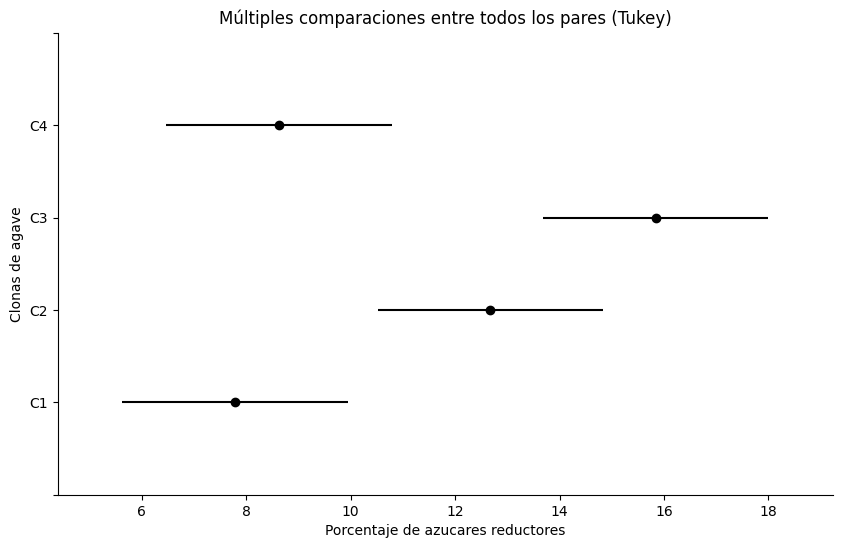

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['azucares'], groups=df['clona'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Clonas de agave",
                        xlabel="Porcentaje de azucares reductores")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#ANDREA GARCIA AMAYA

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(clona)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#ANDREA GARCIA AMAYA

η² (tamaño de efecto): 0.698


In [ ]:
#ANDREA GARCIA AMAYA

**Conclusión general:** El tipo de clona de agave tequilana tiene un efecto significativo en el porcentaje de azúcares reductores totales. La clona C3 presenta el mayor porcentaje con 15.84% es mayor a las clonas C1 con 7.79% y C4 con 8.63%. No se observan diferencias significativas entre las clonas C2 con 12.67%  y C3, ni entre C2 y C4, ni entre C1 y C4.

Para mejorar el porcentaje de azúcares reductores es mejor utilizar la clona C3 ya que tiene el mejor rendimiento y la clona C2 podría ser como una alternativa buena pero con un rendimiento un poco menor y las clonas C1 y C4 no son opción  sus bajos porcentajes de azúcares.

10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


In [ ]:
import pandas as pd
from io import StringIO

datos = '''
caso,porcentaje
CT,5.30
ST,8.02
CT,4.03
ST,13.18
CT,4.00
ST,7.15
CT,2.56
ST,9.11
CT,5.06
ST,8.23
CT,4.06
ST,16.3
CT,2.08
ST,9.20
CT,4.03
ST,6.35
CT,2.04
ST,7.15
CT,1.18
ST,8.66
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
#ANDREA GARCIA AMAYA

,caso,porcentaje
0,CT,5.30
1,ST,8.02
2,CT,4.03
3,ST,13.18
4,CT,4.00
5,ST,7.15
6,CT,2.56
7,ST,9.11
8,CT,5.06
9,ST,8.23


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'porcentaje ~ C(caso)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#ANDREA GARCIA AMAYA

,sum_sq,df,F,PR(>F)
C(caso),174.109005,1.0,30.605669,0.00003
Residual,102.398090,18.0,NaN,NaN


valor-p (Shapiro) = 0.013152795271816523


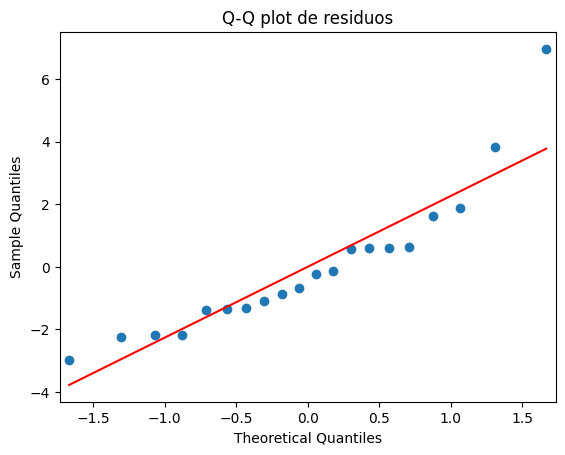

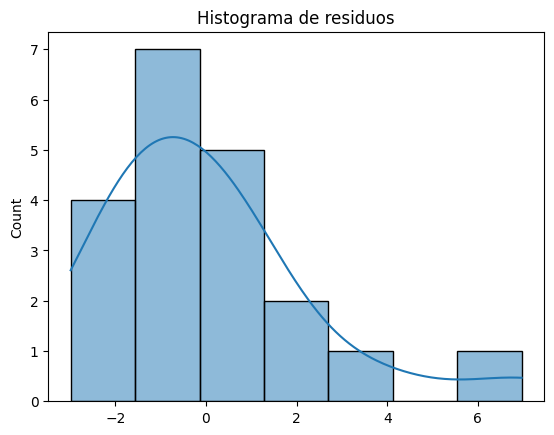

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['caso'] == 'CT']['porcentaje']
grupo2 = df[df['caso'] == 'ST']['porcentaje']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#ANDREA GARCIA AMAYA

p-valor de Levene: 0.30433662983094306


Lambda óptimo: 0.3206116786631181


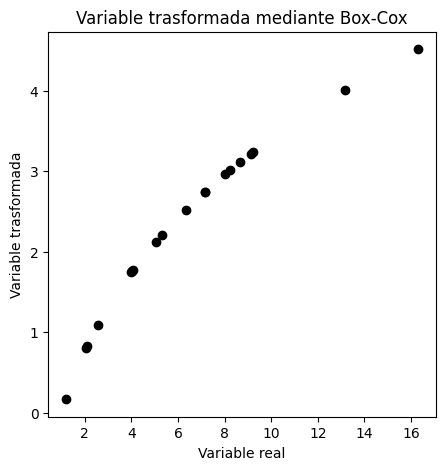

In [ ]:
# Si no se cumple el supuesto de normalidad o el de homoscedasticidad
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Transformación mediante el método box-cox
# Solo funciona si Y > 0
df["respuesta_boxcox"], lambda_opt = boxcox(df["porcentaje"])
print(f"Lambda óptimo: {lambda_opt}")

plt.figure(figsize = (5, 5), dpi = 100)
plt.scatter(df["porcentaje"], df["respuesta_boxcox"], color = "black")
plt.title("Variable trasformada mediante Box-Cox")
plt.xlabel("Variable real")
plt.ylabel("Variable trasformada")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
df

,caso,porcentaje,respuesta_boxcox
0,CT,5.30,2.204887
1,ST,8.02,2.961045
2,CT,4.03,1.757241
3,ST,13.18,4.010783
4,CT,4.00,1.745573
5,ST,7.15,2.741280
6,CT,2.56,1.097026
7,ST,9.11,3.214603
8,CT,5.06,2.126373
9,ST,8.23,3.011640


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'respuesta_boxcox ~ C(caso)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova
#ANDREA GARCIA AMAYA

,sum_sq,df,F,PR(>F)
C(caso),15.859833,1.0,38.91081,0.000007
Residual,7.336701,18.0,NaN,NaN


valor-p (Shapiro) = 0.9455348292593064


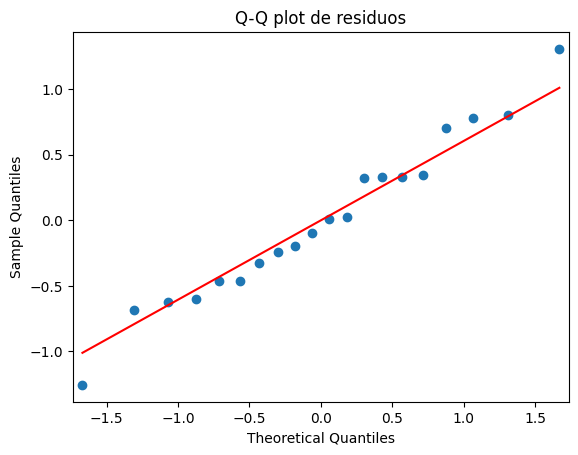

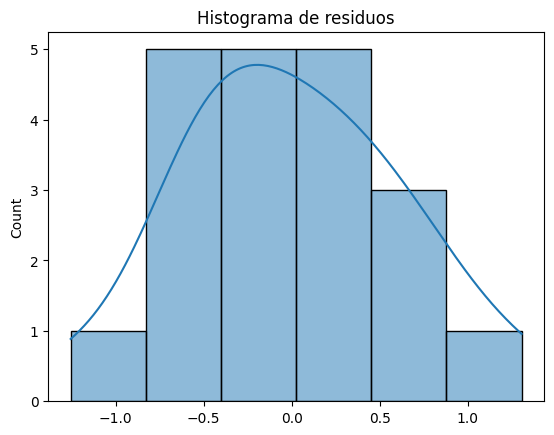

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()
#ANDREA GARCIA AMAYA

In [ ]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['caso'] == 'CT']['respuesta_boxcox']
grupo2 = df[df['caso'] == 'ST']['respuesta_boxcox']

stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")
#ANDREA GARCIA AMAYA

p-valor de Levene: 0.7008973474327473


In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(caso)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")
#ANDREA GARCIA AMAYA

η² (tamaño de efecto): 0.684


**Conclusión general:** El tratamiento de limpieza basado en fuerza centrípeta y aire ionizado reduce significativamente el porcentaje de discos ópticos compactos que presentan cometas. La diferencia media en el porcentaje de defectos entre los lotes con tratamiento y sin tratamiento es de 5.901 esto nos dice que el tratamiento es efectivo para minimizar este tipo de desperdicio en la manufactura entonces si se recomienda hacer el tratamiento de limpieza para mejorar la calidad y que el porcentaje de discos defectuosos sea menos